In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = '/content/iris.data'

In [15]:
columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

In [4]:
df = pd.read_csv(DATA_PATH,names=columns)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.isna().sum(axis=0)

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64

In [23]:
filtered_df = df.dropna()
filtered_df.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [32]:
label_encoder = LabelEncoder()
filtered_df.loc[:,'target'] = label_encoder.fit_transform(filtered_df['target']) 
label_encoder.inverse_transform([0, 1, 2])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array([0, 1, 2])

In [33]:
filtered_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
standard_scaler = StandardScaler()
normalized_df = filtered_df.copy()
normalized_df[['sepal_length', 'sepal_width', 'petal_length','petal_width']] = standard_scaler.fit_transform(normalized_df[['sepal_length', 'sepal_width', 'petal_length','petal_width']])

In [39]:
print('Not normalized df')
print('variance')
print(filtered_df.var())
print('mean')
print(filtered_df.mean())

Not normalized df
variance
sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
target          0.671141
dtype: float64
mean
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64


In [40]:
print('Normalized df')
print('variance')
print(normalized_df.var())
print('mean')
print(normalized_df.mean())

Normalized df
variance
sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
target          0.671141
dtype: float64
mean
sepal_length   -2.775558e-16
sepal_width    -5.140333e-16
petal_length    1.154632e-16
petal_width     9.251859e-16
target          1.000000e+00
dtype: float64


In [43]:
pca_model = PCA(n_components=2)
pc = pca_model.fit_transform(normalized_df)
modified_df = pd.DataFrame(data = pc, columns = ['first_pc', 'second_pc'])
modified_df['target'] = list(filtered_df.target)
modified_df.head()

,first_pc,second_pc,target
0,-2.476965,0.500585,0
1,-2.313886,-0.659120,0
2,-2.567994,-0.324384,0
3,-2.509251,-0.580856,0
4,-2.588980,0.668663,0


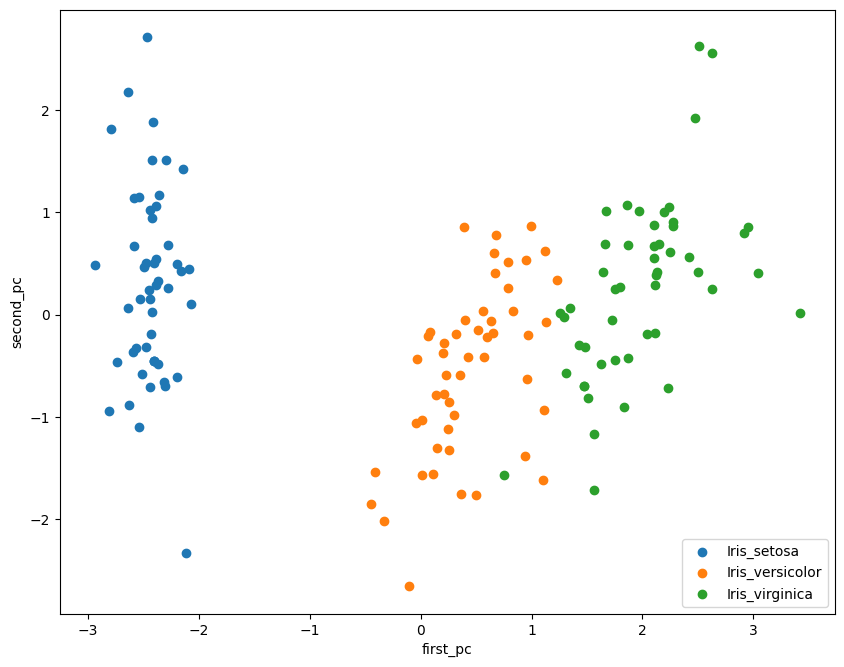

In [46]:
Iris_setosa = modified_df[modified_df['target']==0]
Iris_versicolor = modified_df[modified_df['target']==1]
Iris_virginica = modified_df[modified_df['target']==2]


plt.scatter(Iris_setosa['first_pc'],Iris_setosa['second_pc'], label = 'Iris_setosa')
plt.scatter(Iris_versicolor['first_pc'],Iris_versicolor['second_pc'], label = 'Iris_versicolor')
plt.scatter(Iris_virginica['first_pc'],Iris_virginica['second_pc'], label = 'Iris_virginica')

# Plot
plt.xlabel('first_pc')
plt.ylabel('second_pc')
plt.legend()
plt.show()

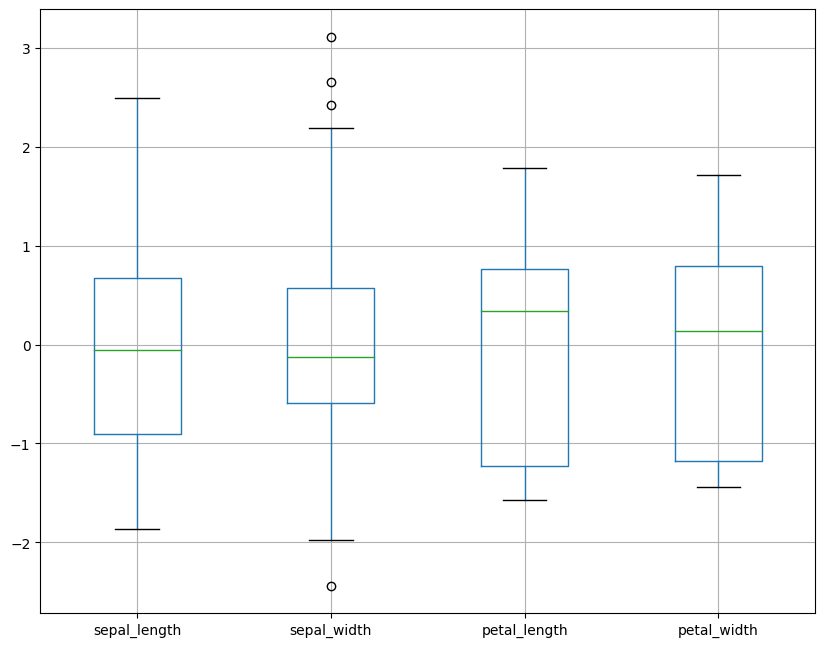

In [48]:
normalized_df.boxplot(column=columns[:-1])